# American Express Probability of Churning Project

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

In [3]:
os.getcwd()

'/Users/mistygarcia/Documents/projects/amex_default_prediction/notebooks/misty'

In [4]:
os.listdir('../../data/raw')

['train_labels.csv', '.DS_Store', '.gitkeep', 'train_data.csv']

In [5]:
path_data = '~/Documents/projects/amex_default_prediction/data/raw/'

#### labels

In [6]:
y = pd.read_csv(path_data + 'train_labels.csv')
y

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [7]:
y.customer_ID.value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    1
aab6cd60f43333ffbf74b6500af488da9966c9c5d7bb503c90db0ae695f907c4    1
aa5f0a0add6369c75c051f901120fbf459925ba2b4a8136b0c05edd48be2f0c5    1
aa5ee4d6e08edd3785feb1d22a2b743b360048733afe160963d1ea79e28ac0d3    1
aa5ee11132972c48030b6d70bb5581030881c6a719eed89a7d6c2fae7c00b0d5    1
                                                                   ..
5524f85ff22a78cb1c9d4b73e9ec7207c759af5c4eeabfac9f26f3b5e8449f6f    1
5524e344a926262985d457dd032d7331cf35fb7b9c46aeb86e4d188383a3517e    1
55248e11e065ada462656af589c579d241a78e1679cbcde8f8ecd395cf2042c4    1
55248098f5e9df59ba46d6910666ca6b3d72ca5ad3d7b0088bd1583537bd086f    1
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    1
Name: customer_ID, Length: 458913, dtype: int64

In [8]:
y.target.value_counts()

0    340085
1    118828
Name: target, dtype: int64

#### data

In [9]:
df0 = pd.read_csv(path_data + 'train_data.csv')

In [10]:
df0.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 7.8+ GB


## Prepare

In [12]:
df1 = df0.merge(y,how='inner',on='customer_ID')
df = df1.sample(1_000_000).copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 5380419 to 2862405
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 1.4+ GB


In [14]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [15]:
df = df.reindex(sorted(df.columns), axis=1)
df.columns = df.columns.str.lower().str.replace('_','')

#### columns

D_* = Delinquency variables

S_* = Spend variables

P_* = Payment variables

B_* = Balance variables

R_* = Risk variables

In [16]:
df.columns

Index(['b1', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18',
       ...
       's26', 's27', 's3', 's5', 's6', 's7', 's8', 's9', 'customerid',
       'target'],
      dtype='object', length=191)

In [17]:
col_variables = ['d', 's', 'p', 'b', 'r']

for c_var in col_variables:
    c_var_separate = []
    for col in df.columns:
        if col.startswith(c_var):
            c_var_separate.append(col)
    print(c_var, len(c_var_separate))

d 96
s 22
p 3
b 40
r 28


#### categorical_variables

In [18]:
col_categories = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
col_categories = [col_cat.lower().replace('_', '') for col_cat in col_categories]

In [86]:
for col_cat in col_categories:
    print(df[col_cat].value_counts(dropna=False))
    print()

0.0    851208
1.0    138377
2.0     10034
NaN       381
Name: b30, dtype: int64

2.0    353252
3.0    226900
1.0    209455
5.0     80401
4.0     53375
7.0     46904
6.0     29332
NaN       381
Name: b38, dtype: int64

1.0    600739
0.0    367393
NaN     31868
Name: d114, dtype: int64

0.0    966945
NaN     31868
1.0      1187
Name: d116, dtype: int64

-1.0    263330
 3.0    211031
 4.0    205757
 2.0    120694
 5.0     82750
 6.0     62349
 NaN     31868
 1.0     22221
Name: d117, dtype: int64

0.0    855194
1.0    112938
NaN     31868
Name: d120, dtype: int64

 1.0    771041
 0.0    160486
-1.0     47343
 NaN     21130
Name: d126, dtype: int64

CO    745013
CR    167947
CL     79089
XZ      4742
XM      1933
XL      1276
Name: d63, dtype: int64

O      526965
U      275384
R      152001
NaN     39067
-1       6583
Name: d64, dtype: int64

NaN    886989
1.0    111826
0.0      1185
Name: d66, dtype: int64

6.0    503008
5.0    216663
3.0     87756
4.0     86796
2.0     39947
NaN     389

#### split by column type

In [20]:
df_d = df.filter(regex= '^d')
df_s = df.filter(regex= '^s')
df_p = df.filter(regex= '^p')
df_b = df.filter(regex= '^b')
df_r = df.filter(regex= '^r')

#### delinquency variables

In [21]:
df_d.head(10).iloc[:,:35].T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
d102,0.003500,0.002875,0.950319,1.087488,0.560123,0.498315,0.577969,0.006022,0.201437,0.547221
d103,0.004476,0.005583,1.004011,1.004744,1.001496,1.005570,1.008027,0.000850,1.004304,1.000160
d104,0.003464,0.005983,0.978641,1.021999,0.968867,0.968978,0.966291,0.003274,0.961359,0.961921
d105,NaN,NaN,0.476939,1.114699,0.852530,0.359305,0.286599,NaN,0.159463,0.214970
d106,NaN,NaN,NaN,0.523110,NaN,NaN,NaN,NaN,NaN,NaN
d107,0.009321,0.007979,0.338813,0.336199,0.674115,0.343030,0.341617,0.000360,0.339294,0.341651
d108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d109,0.006185,0.007149,0.002341,0.005390,0.002975,0.008866,0.006236,0.004484,0.008806,0.007854
d110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_d.head(10).iloc[:,35:70].T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
d137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d139,0.00178,0.00092,0.005859,1.009225,1.008306,1.004875,1.003657,0.00069,0.00211,0.000761
d140,0.001883,0.007072,0.009506,0.00032,0.009047,0.000875,0.005947,0.008945,0.009555,0.007202
d141,0.003528,0.009113,0.008221,0.889605,0.865936,0.906902,0.994459,0.008441,0.004177,0.008678
d142,NaN,NaN,NaN,0.658424,0.00656,0.518918,0.717251,NaN,NaN,NaN
d143,0.002719,0.003592,0.005744,1.007949,1.007838,1.007293,1.006319,0.004917,0.008798,0.005922
d144,0.003721,0.007183,0.009337,0.592623,0.061846,0.14643,0.926041,0.007952,0.004733,0.009846
d145,0.006627,0.007367,0.006565,0.278962,0.093107,0.458749,0.372458,0.00294,0.008863,0.009144
d39,0.002292,0.030686,0.00402,0.240066,0.182132,1.473308,0.005589,0.00484,0.03221,0.29844


In [23]:
df_d.head(10).iloc[:,70:].T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
d68,6.000000,6.000000,4.000000,6.000000,5.000000,4.000000,6.000000,6.000000,6.000000,6.000000
d69,0.004352,0.002256,0.008341,0.001765,0.009386,0.004016,0.001662,0.001118,0.005716,0.003527
d70,0.004917,0.005317,0.256710,0.001762,0.252996,0.004457,0.250652,0.002206,0.000529,0.004250
d71,0.010699,0.008471,0.007350,0.035637,0.004717,0.293983,0.010391,0.029269,0.071973,0.048879
d72,0.003081,0.007547,0.001478,0.003883,0.000919,0.335933,0.000397,0.003215,0.006681,0.006718
d73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d74,0.077452,0.000690,0.285924,0.218982,0.145563,0.004417,0.075386,0.000161,0.001106,0.147884
d75,0.073252,0.000046,0.338048,0.270255,0.209649,0.005463,0.140361,0.005637,0.001453,0.141440
d76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d77,0.044167,1.505008,0.130631,0.058312,NaN,0.089777,NaN,NaN,NaN,0.050161


#### spend variables

In [24]:
df_s.head(10).T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
s11,0.286575,0.32759,0.368221,0.483321,0.36174,0.643887,0.362846,0.282106,0.406507,0.603263
s12,0.19124,0.191487,0.191501,0.192201,0.241124,0.187746,0.233751,0.19423,0.188979,0.189122
s13,0.007377,0.42685,0.00446,0.289476,0.428952,0.407679,0.421426,0.005187,0.686461,0.850796
s15,0.507074,0.309285,0.400148,0.403124,0.206873,0.401857,0.100984,0.501729,0.308445,0.309484
s16,0.002308,0.009943,0.002623,0.22898,0.009405,0.003714,0.006681,0.001797,0.006097,0.001507
s17,0.005373,0.004045,0.004662,0.008858,0.009446,0.007883,0.007719,0.003493,0.008414,0.159403
s18,0.006793,1.009833,0.003439,0.005181,1.008202,0.006299,0.00792,0.003726,0.009331,0.006072
s19,0.009928,0.006008,0.004893,0.000975,0.005649,0.005646,0.005934,0.002256,0.00594,0.005607
s2,2017-12-27,2017-09-16,2017-12-05,2018-02-10,2017-11-20,2018-02-04,2017-09-26,2017-09-27,2018-01-13,2017-11-01
s20,0.007366,0.004064,0.009351,0.002961,0.000674,0.009797,0.008531,0.00364,0.001671,0.000112


In [25]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
s11,1000000.0,0.375181,0.191132,-1.999467e-01,0.282446,0.289728,0.448698,2.929741
s12,1000000.0,0.240211,0.244114,-4.041090e-01,0.186894,0.190830,0.208762,92.946722
s13,1000000.0,0.254400,0.296658,7.447699e-08,0.004885,0.009790,0.427711,1.010000
s15,1000000.0,0.374797,0.195089,-2.999995e-01,0.207559,0.401829,0.504829,5.105455
s16,1000000.0,0.051085,0.797147,3.365506e-08,0.002552,0.005106,0.007662,231.753914
s17,1000000.0,0.040065,0.243262,1.505726e-09,0.002683,0.005366,0.008052,4.049070
s18,1000000.0,0.031649,0.161070,4.075929e-11,0.002575,0.005140,0.007712,1.010000
s19,1000000.0,0.005030,0.003122,3.156390e-09,0.002508,0.005011,0.007515,0.458106
s20,1000000.0,0.017506,0.111162,3.514967e-09,0.002535,0.005065,0.007591,1.009999
s22,996604.0,0.778537,0.742044,-9.199741e+01,0.810969,0.942222,0.964760,1.032665


#### payment variables

In [26]:
df_p.head(10).T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
p2,0.811467,0.603928,0.681260,0.920349,0.866314,0.348156,0.610376,0.955835,0.992572,0.736622
p3,0.547754,0.638694,0.785316,1.071298,0.585989,0.512893,0.346503,0.666529,0.688711,0.783339
p4,0.005790,0.002199,0.000213,0.003367,0.004226,0.005075,0.002773,0.006235,0.005846,0.007617


In [27]:
df_p.describe().T

,count,mean,std,min,25%,50%,75%,max
p2,991726.0,0.656134,0.244632,-4.403368e-01,0.480270,0.694145,0.864670,1.010000
p3,945620.0,0.601362,0.170536,-1.128727e+00,0.541082,0.618241,0.683945,2.353487
p4,1000000.0,0.144247,0.338592,9.945989e-09,0.002927,0.005851,0.008768,1.239343


#### balance variables

In [28]:
df_b.head().T

,5380419,1258985,1980218,2706326,1291623
b1,0.008160,0.041416,0.005231,0.196600,0.083827
b10,0.041989,0.298035,0.021739,0.029827,0.079896
b11,0.003276,0.032694,0.006469,0.165554,0.078268
b12,0.006563,2.781267,0.236944,0.016404,0.171525
b13,0.006854,2.248245,0.161072,0.095367,0.166584
b14,0.007273,1.764055,0.011577,0.076587,0.267264
b15,0.004063,0.008682,0.001221,0.007258,0.009001
b16,0.008987,0.003872,0.507701,0.917121,1.007437
b17,NaN,NaN,0.006211,0.344937,1.000568
b18,0.697591,1.002409,0.479488,0.148921,0.205456


In [29]:
df_b.describe().T

,count,mean,std,min,25%,50%,75%,max
b1,1000000.0,0.123990,0.212182,-1.248558e+00,0.008855,0.031237,0.125443,1.324057
b10,1000000.0,0.231518,3.603913,-2.957859e-03,0.028964,0.110622,0.295544,1091.425126
b11,1000000.0,0.110986,0.208587,3.717132e-08,0.006584,0.019365,0.101415,1.569839
b12,1000000.0,0.092755,0.534594,5.254908e-07,0.010880,0.019468,0.068982,194.451568
b13,991092.0,0.100272,0.464968,2.131900e-08,0.009260,0.029284,0.089369,129.364242
b14,1000000.0,0.100975,0.278072,-8.469854e+00,0.008143,0.028448,0.100231,43.516159
b15,998832.0,0.052497,0.293524,-1.000805e+01,0.003133,0.006230,0.009288,51.172254
b16,999619.0,0.348463,0.402168,3.609383e-09,0.006237,0.091770,0.756498,1.010000
b17,432785.0,0.715005,0.387019,4.851563e-07,0.477738,0.932075,1.002238,1.010000
b18,1000000.0,0.596199,0.365497,8.547870e-08,0.206745,0.646672,1.003276,1.010000


#### risk variables

In [30]:
df_r.head(10).T

,5380419,1258985,1980218,2706326,1291623,4697726,431396,2373167,3383842,3967
r1,0.000789,0.008440,0.004670,0.004677,0.006062,0.007391,0.504401,0.009990,0.007961,0.004155
r10,0.001412,0.001984,0.007582,0.009711,0.004968,0.001367,0.000330,0.005497,0.004676,0.001907
r11,0.001122,0.003253,0.000464,0.000289,0.002873,0.001611,0.004444,0.004678,0.007202,0.001034
r12,1.009911,1.009226,1.008686,1.002827,1.008818,1.005082,1.002262,1.006901,1.005460,1.003775
r13,0.004494,0.007153,0.004906,0.005677,0.001069,0.002988,0.003818,0.007933,0.008053,0.003406
r14,0.001890,0.005304,0.005526,0.005648,0.002763,0.009151,0.000510,0.005853,0.000773,0.001595
r15,0.009828,0.000704,0.002285,0.001090,0.007502,0.009116,0.002732,0.002701,0.000097,0.005728
r16,0.000969,0.007406,0.006901,0.004403,0.001447,0.007061,0.007653,0.000030,0.006163,0.003677
r17,0.001457,0.007241,0.002030,0.006102,0.005299,0.004659,0.003919,0.004529,0.001225,0.008084
r18,0.007067,0.003918,0.000433,0.006766,0.000013,0.008423,0.002046,0.007175,0.004761,0.005909


In [31]:
df_r.describe().T

,count,mean,std,min,25%,50%,75%,max
r1,1000000.0,0.078758,0.225763,1.534223e-09,0.002890,0.005776,0.008661,2.833301
r10,1000000.0,0.065270,0.307933,1.390737e-08,0.002626,0.005245,0.007874,12.006259
r11,1000000.0,0.050633,0.174346,3.016666e-09,0.002711,0.005411,0.008114,7.004317
r12,999993.0,0.979197,0.153833,-9.179347e-02,1.002282,1.004857,1.007417,1.010000
r13,1000000.0,0.005472,0.007033,3.577781e-09,0.002530,0.005041,0.007566,0.555221
r14,1000000.0,0.239344,7.949534,4.684081e-09,0.002533,0.005069,0.007608,2363.278867
r15,1000000.0,0.020135,0.122118,8.904018e-09,0.002542,0.005077,0.007619,1.009999
r16,1000000.0,0.058436,0.237695,1.136892e-08,0.002703,0.005409,0.008109,11.005825
r17,1000000.0,0.005316,0.006484,1.066114e-09,0.002514,0.005025,0.007535,0.607151
r18,1000000.0,0.005003,0.003132,2.170287e-09,0.002491,0.004993,0.007496,0.493027


#### customer ids

In [32]:
df.customerid.value_counts().value_counts().sort_index()

1     105896
2     125248
3      96360
4      51830
5      20150
6       5918
7       1277
8        223
9         23
10         2
Name: customerid, dtype: int64

In [33]:
df.customerid.value_counts().index[0]

'4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59bff1f29312eb3678a3'

In [34]:
subset = df [df.customerid == df.customerid.value_counts().index[0]]
subset

,b1,b10,b11,b12,b13,b14,b15,b16,b17,b18,...,s26,s27,s3,s5,s6,s7,s8,s9,customerid,target
1717689,0.007934,0.101498,0.006927,0.013479,0.001400,0.007274,0.005863,0.087858,NaN,0.652705,...,0.009747,NaN,NaN,0.005709,1.001480,NaN,0.002304,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717690,0.000955,0.109482,0.000543,0.015143,0.003213,0.009328,0.009846,0.000582,NaN,0.650209,...,0.002443,NaN,NaN,0.004802,1.009454,NaN,0.003636,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717680,0.003100,0.110473,0.005204,0.015194,0.000658,0.006494,0.005028,0.840629,0.002388,0.645159,...,0.002199,NaN,NaN,0.004902,1.004014,NaN,0.002186,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717686,0.003509,0.060962,0.000899,0.011024,0.009401,0.006837,0.009312,0.337392,NaN,0.648314,...,0.007097,NaN,NaN,0.006483,1.007384,NaN,0.000706,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717679,0.008442,0.118494,0.008505,0.010922,0.004958,0.001671,0.001973,0.924215,0.004353,0.648453,...,0.004733,NaN,NaN,0.003479,1.001205,NaN,0.000483,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717688,0.007046,0.123531,0.004420,0.009150,0.004408,0.005418,0.005543,0.169685,NaN,0.647770,...,0.002856,NaN,NaN,0.002963,1.009431,NaN,0.000148,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717678,0.003519,0.115104,0.008602,0.012826,0.007691,0.008104,0.008752,0.923479,0.008036,0.650298,...,0.009513,NaN,NaN,0.007982,1.002983,NaN,0.004786,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717684,0.006660,0.128304,0.000995,0.009397,0.002707,0.003375,0.006990,0.592681,NaN,0.649508,...,0.002207,NaN,NaN,0.001999,1.006657,NaN,0.008391,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717687,0.008875,0.121500,0.005584,0.009483,0.001436,0.000877,0.002138,0.256681,NaN,0.652847,...,0.004124,NaN,NaN,0.000147,1.001915,NaN,0.006971,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0
1717685,0.005849,0.125024,0.009613,0.008612,0.002806,0.006996,0.002992,0.420924,NaN,0.651773,...,0.005473,NaN,NaN,0.005725,1.004183,NaN,0.007208,NaN,4f3bde9eb4a97c447ee6d972c3a1c24a90d8309c930e59...,0


In [35]:
subset.s2.sort_values()

1717678    2017-03-20
1717679    2017-04-07
1717680    2017-05-08
1717684    2017-09-19
1717685    2017-10-07
1717686    2017-11-07
1717687    2017-12-20
1717688    2018-01-20
1717689    2018-02-17
1717690    2018-03-20
Name: s2, dtype: object

#### all_variables

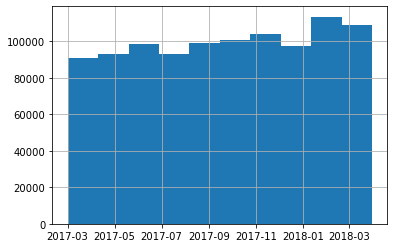

In [37]:
df.s2.astype('datetime64').hist()
plt.show()

In [53]:
(df1.target == 1).sum() / len(df1)

0.24909720794778803

In [54]:
(df.target == 1).sum() / len(df)

0.249196

#### nulls

In [66]:
df.isnull().sum() [df.isnull().sum() > 1].sort_values()

r12          7
b40         11
b37         11
r20         13
b6          47
         ...  
d110    994341
d111    994341
d108    994685
d88     998915
d87     999309
Length: 120, dtype: int64

In [82]:
pd.crosstab(df.target,df.d87.fillna(0))

d87,0.0,1.0
target,,
0,750706,98
1,248603,593


In [83]:
pd.crosstab(df.target,df.d87.fillna(0),normalize='columns')

d87,0.0,1.0
target,,
0,0.751225,0.141823
1,0.248775,0.858177


In [84]:
df.dropna(thresh=100)

,b1,b10,b11,b12,b13,b14,b15,b16,b17,b18,...,s26,s27,s3,s5,s6,s7,s8,s9,customerid,target
5380419,0.008160,0.041989,0.003276,0.006563,0.006854,0.007273,0.004063,0.008987,NaN,0.697591,...,0.002960,NaN,NaN,0.004446,1.002418,NaN,0.004311,NaN,f8fcb786718efa3156cafdeb470425b6b6f66dcb0d8975...,0
1258985,0.041416,0.298035,0.032694,2.781267,2.248245,1.764055,0.008682,0.003872,NaN,1.002409,...,0.008662,0.567885,0.087298,4.711870,0.009805,0.044356,0.488388,1.080830,3a0a67a0fb08fd5aa12e9f4a06a817cf4b7cf10d0158c8...,0
1980218,0.005231,0.021739,0.006469,0.236944,0.161072,0.011577,0.001221,0.507701,0.006211,0.479488,...,0.001193,0.402345,0.379802,0.007775,0.005845,0.389737,0.249137,0.008079,5b69eda5fdf17d279f0f9334b24089b0887e92c01dbc42...,1
2706326,0.196600,0.029827,0.165554,0.016404,0.095367,0.076587,0.007258,0.917121,0.344937,0.148921,...,0.305366,0.656284,0.112241,0.053013,0.002537,0.082786,0.320747,0.003071,7ced483c1107458f2c3f008ca4a0f8b1f8ca563868a1f0...,0
1291623,0.083827,0.079896,0.078268,0.171525,0.166584,0.267264,0.009001,1.007437,1.000568,0.205456,...,0.004840,0.126844,0.144486,0.195695,0.008426,0.106177,0.759517,0.225154,3b86516c1eda4821764282ed4e93578470a55ea46cb020...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110719,0.462341,0.012200,0.415050,0.010759,0.010437,0.107714,0.004416,1.001177,0.657127,0.002428,...,0.006277,0.008484,0.202058,0.007243,1.004482,0.130503,0.706039,NaN,ec68deb32a119b0d16a98bda112674c05bcde1e7f3e400...,1
684866,0.008187,0.301209,0.007659,0.001013,0.008203,0.006687,0.002584,0.001445,NaN,1.002881,...,0.000772,NaN,NaN,0.007820,1.002911,NaN,0.004019,NaN,1fd670c1279eaf0daae89995d08e9481ce168e153f382b...,0
4233868,0.263872,0.131232,0.284807,0.129635,0.198904,0.659402,0.772380,0.836529,0.566295,0.202362,...,0.003260,0.161329,0.065220,0.247338,0.000108,0.042941,1.160006,0.044998,c3b928d8b60a5bea84148503e0a8ad3c47845f7a06d266...,0
5238009,0.101966,0.043560,0.064398,0.011783,0.008645,0.021450,0.006700,1.008119,0.998818,0.237249,...,0.001820,NaN,0.168855,0.007713,0.009715,0.156574,0.331209,NaN,f24529ddf71cb56bf7c9e626c7141a348a0e15f502ec28...,1


In [85]:
df

,b1,b10,b11,b12,b13,b14,b15,b16,b17,b18,...,s26,s27,s3,s5,s6,s7,s8,s9,customerid,target
5380419,0.008160,0.041989,0.003276,0.006563,0.006854,0.007273,0.004063,0.008987,NaN,0.697591,...,0.002960,NaN,NaN,0.004446,1.002418,NaN,0.004311,NaN,f8fcb786718efa3156cafdeb470425b6b6f66dcb0d8975...,0
1258985,0.041416,0.298035,0.032694,2.781267,2.248245,1.764055,0.008682,0.003872,NaN,1.002409,...,0.008662,0.567885,0.087298,4.711870,0.009805,0.044356,0.488388,1.080830,3a0a67a0fb08fd5aa12e9f4a06a817cf4b7cf10d0158c8...,0
1980218,0.005231,0.021739,0.006469,0.236944,0.161072,0.011577,0.001221,0.507701,0.006211,0.479488,...,0.001193,0.402345,0.379802,0.007775,0.005845,0.389737,0.249137,0.008079,5b69eda5fdf17d279f0f9334b24089b0887e92c01dbc42...,1
2706326,0.196600,0.029827,0.165554,0.016404,0.095367,0.076587,0.007258,0.917121,0.344937,0.148921,...,0.305366,0.656284,0.112241,0.053013,0.002537,0.082786,0.320747,0.003071,7ced483c1107458f2c3f008ca4a0f8b1f8ca563868a1f0...,0
1291623,0.083827,0.079896,0.078268,0.171525,0.166584,0.267264,0.009001,1.007437,1.000568,0.205456,...,0.004840,0.126844,0.144486,0.195695,0.008426,0.106177,0.759517,0.225154,3b86516c1eda4821764282ed4e93578470a55ea46cb020...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110719,0.462341,0.012200,0.415050,0.010759,0.010437,0.107714,0.004416,1.001177,0.657127,0.002428,...,0.006277,0.008484,0.202058,0.007243,1.004482,0.130503,0.706039,NaN,ec68deb32a119b0d16a98bda112674c05bcde1e7f3e400...,1
684866,0.008187,0.301209,0.007659,0.001013,0.008203,0.006687,0.002584,0.001445,NaN,1.002881,...,0.000772,NaN,NaN,0.007820,1.002911,NaN,0.004019,NaN,1fd670c1279eaf0daae89995d08e9481ce168e153f382b...,0
4233868,0.263872,0.131232,0.284807,0.129635,0.198904,0.659402,0.772380,0.836529,0.566295,0.202362,...,0.003260,0.161329,0.065220,0.247338,0.000108,0.042941,1.160006,0.044998,c3b928d8b60a5bea84148503e0a8ad3c47845f7a06d266...,0
5238009,0.101966,0.043560,0.064398,0.011783,0.008645,0.021450,0.006700,1.008119,0.998818,0.237249,...,0.001820,NaN,0.168855,0.007713,0.009715,0.156574,0.331209,NaN,f24529ddf71cb56bf7c9e626c7141a348a0e15f502ec28...,1


In [ ]:
df.dropna()